Name: Eze Nnamdi Shedrack
Andrew ID: seze@andrew.cmu.edu
Course: Data, Inference, and Applied ML

Question 1:
Daily energy intake in kJ was measured for 11 women (Altman, 1991): 5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770. We wish to investigate whether the women’s energy intake deviates systematically from a recommended value of 7725 kJ. Assuming this data comes from a normal distribution, use a ttest to test whether the distribution might have a mean of 7725 kJ. Explain whether a left-tailed, right-tailed, or two-tailed test is appropriate. Give the sample mean, sample standard deviation, standard error of the mean (SEM), t statistic, degrees of freedom, and p-value. Finally, explain whether the null hypothesis is rejected or not. 

Expected Results: Six numbers and qualitative answers

In [1]:
# Required Libraries. Run this cell to import necessary libraries for all the codes
import pandas as pnd  # Import pandas as pnd
import numpy as nmp   # Import numpy as nmp
from scipy import stats  # Import statistical functions
import requests as rqst # Import requests for API calls
import tabulate as tbl  # Import tabulate for table formatting
import matplotlib.pyplot as mplt  # Import matplotlib for plotting
import warnings  # To manage warning messages during execution
warnings.filterwarnings("ignore")  # Suppress future warnings for cleaner output
# End of Required Libraries

In [2]:
import numpy as nmp # Imports the numpy library, which is useful for numerical operations, and assigns it the alias 'np'.
from scipy import stats as mystat # Imports the stats module from the scipy library, which contains functions for statistical tests.
from tabulate import tabulate # Imports the tabulate library for creating formatted tables to display results clearly.

# --- Step 1: Define the data and parameters ---
daily_energy_intake_data = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770] # Creates a list to hold the daily energy intake values for the 11 women.
recommended_population_mean = 7725 # Defines the recommended energy intake value we are testing against.

# --- Step 2: Calculate descriptive statistics ---
my_sample_size = len(daily_energy_intake_data) # Calculates the number of observations in our data sample, which is 11.
my_sample_mean = nmp.mean(daily_energy_intake_data) # Calculates the average of the values in our data list.
my_sample_std = nmp.std(daily_energy_intake_data, ddof=1) # Calculates the sample standard deviation. 'ddof=1' ensures we divide by N-1, which is correct for a sample.
my_sem = my_sample_std / nmp.sqrt(my_sample_size) # Calculates the Standard Error of the Mean (SEM) by dividing the standard deviation by the square root of the sample size.

# --- Step 3: Perform the t-test ---
t_statistic, p_value = mystat.ttest_1samp(a=daily_energy_intake_data, popmean=recommended_population_mean) # Performs a one-sample t-test to compare the sample mean to the population mean and gets the t-statistic and p-value.

# --- Step 4: Display all results in a single comprehensive table ---
results_table = [ # Creates a list of lists to hold all statistical results for table formatting
    ["Sample Size", my_sample_size, "Number of observations in the study"], # Row for sample size with description
    ["Sample Mean", f"{my_sample_mean:.2f} kJ", "Average daily energy intake of the sample"], # Row for sample mean with units
    ["Recommended Mean", f"{recommended_population_mean} kJ", "Population reference value being tested"], # Row for recommended mean for comparison
    ["Standard Deviation", f"{my_sample_std:.2f} kJ", "Measure of variability in the sample data"], # Row for standard deviation with units
    ["Standard Error (SEM)", f"{my_sem:.2f} kJ", "Precision estimate of the sample mean"], # Row for standard error of the mean
    ["T-statistic", f"{t_statistic:.4f}", "Test statistic from the one-sample t-test"], # Row for t-statistic value
    ["P-value", f"{p_value:.4f}", "Probability under the null hypothesis assumption"], # Row for p-value result
    ["Degree of Freedom", my_sample_size - 1, "Number of independent values in the sample"], # Row for degrees of freedom
    ["Statistical Decision", "Reject H₀" if p_value < 0.05 else "Fail to reject H₀", "Conclusion at α = 0.05 significance level"] # Row for final decision based on p-value
]

print(tabulate(results_table, headers=["Statistic", "Value", "Description"], tablefmt="grid")) # Displays all results in a formatted table with headers
print("---"*15) # Separator line for clarity
print(results_table[8][1]) # Print decision

+----------------------+------------+--------------------------------------------------+
| Statistic            | Value      | Description                                      |
+======================+============+==================================================+
| Sample Size          | 11         | Number of observations in the study              |
+----------------------+------------+--------------------------------------------------+
| Sample Mean          | 6753.64 kJ | Average daily energy intake of the sample        |
+----------------------+------------+--------------------------------------------------+
| Recommended Mean     | 7725 kJ    | Population reference value being tested          |
+----------------------+------------+--------------------------------------------------+
| Standard Deviation   | 1142.12 kJ | Measure of variability in the sample data        |
+----------------------+------------+--------------------------------------------------+
| Standard Error (SEM

Question2:
Download “CO2 emissions excluding LULUCF( tons per capita)” data from the World Bank Indicators. Select the emissions for all countries in 2023 and calculate summary statistics. Provide a table giving the mean, median, standard deviation, 5, 25, 75, and 95 percentiles.Repeat the same process for “Primary completion rate, total (% of relevant age group)”
Expected Results: Two Tables and qualitative answers

In [3]:
import pandas as pnd          # This library helps us work with data in tables like Excel spreadsheets
import requests as rqst       # This library allows us to get data from websites and online APIs
import numpy as nmp           # This library provides mathematical functions for calculations and statistics
from tabulate import tabulate # This library helps us display data in nice-looking tables with borders

# We are studying two important measurements from the World Bank database
required_indicators = {       
    "EN.GHG.CO2.PC.CE.AR5": "CO₂ Emissions per Capita",          # How much carbon dioxide each person produces on average
    "SE.PRM.CMPT.ZS": "Primary Completion Rate"                  # What percentage of children finish primary school
}

required_year = "2023"        # We want to look at the most recent data from the year 2023

def fetch_worldbank_data(required_indicator, required_year):     
    # This function contacts the World Bank website to get the data we need
    indicator_url = f"http://api.worldbank.org/v2/country/all/indicator/{required_indicator}?date={required_year}&format=json&per_page=1000"  # We build the web address for the specific data we want
    data_response = rqst.get(indicator_url)                      # We send a request to the World Bank website to get the data
    data = data_response.json()                                  # The website sends back data in JSON format which we convert to Python
    # We go through each country's data and keep only the ones that have actual numbers
    records_required = [{'Country': entry['country']['value'], 'Value': entry['value']} for entry in data[1] if entry['value'] is not None]  
    return pnd.DataFrame(records_required)                       # We organize the data into a table format that's easy to work with

def compute_summary(df_emissions):                                         
    # This function calculates various statistics to understand the data better
    values = df_emissions['Value']                                         # We extract just the numbers from our data table
    return {                                                     # We calculate several different statistical measurements:
        'Mean': nmp.mean(values),                                # The average value of all countries
        'Median': nmp.median(values),                            # The middle value when all countries are sorted
        'Standard Deviation': nmp.std(values),                   # How spread out the values are from the average
        '5th Percentile': nmp.percentile(values, 5),             # Value below which 5% of countries fall (very low values)
        '25th Percentile': nmp.percentile(values, 25),           # Value below which 25% of countries fall (lower quarter)
        '75th Percentile': nmp.percentile(values, 75),           # Value below which 75% of countries fall (upper quarter)
        '95th Percentile': nmp.percentile(values, 95)            # Value below which 95% of countries fall (very high values)
    }

# First, we get all the data for both indicators before displaying anything
all_results = {}
# We go through each indicator one by one to collect their data
for data_points, name in required_indicators.items():
    df_emissions = fetch_worldbank_data(data_points, required_year)  # Get the data from World Bank
    # Only calculate statistics if we actually received data for this indicator
    all_results[name] = compute_summary(df_emissions) if not df_emissions.empty else None

# Now we prepare to display both tables next to each other for easy comparison
table_lines = []
# We process each indicator's statistics to create table formats
for name, summary in all_results.items():
    if summary:  # Only create a table if we have data for this indicator
        # We convert the statistics into rows that will form our table
        table_data = [[stat, f"{value:.3f}"] for stat, value in summary.items()]
        # We use tabulate to create a nicely formatted table with borders
        table = tabulate(table_data, headers=["Statistic", name], tablefmt="grid", stralign="right")
        table_lines.append(table.split('\n'))  # We split the table into separate lines for side-by-side display

# Finally, we display both tables next to each other
print(f"\n                                          Summary Statistics for World Bank Indicators ({required_year})\n")
# We go through each line of the tables and print them together
print("Table 1: CO₂ Emissions per Capita" + " " * 50 + "Table 2: Primary Completion Rate")  # Header for both tables
for i in range(len(table_lines[0])):  
    # We take the same line from both tables and put them next to each other with spacing
    line = "                            ".join(table[i] for table in table_lines)  
    print(line)  # We print the combined line so both tables appear side by side


                                          Summary Statistics for World Bank Indicators (2023)

Table 1: CO₂ Emissions per Capita                                                  Table 2: Primary Completion Rate
+--------------------+----------------------------+                            +--------------------+---------------------------+
|          Statistic |   CO₂ Emissions per Capita |                            |          Statistic |   Primary Completion Rate |
+====================+============================+                            +====================+===========================+
|               Mean |                      4.459 |                            |               Mean |                    88.501 |
+--------------------+----------------------------+                            +--------------------+---------------------------+
|             Median |                      2.602 |                            |             Median |                    91.332 |
+-------

Question 3:
Using the World Bank Indicators, download data for “GDP per capita (current US$)” and “Prevalence of underweight, weight for age (% of children under 5 ).” What kind of relationship do you expect? Make a scatter plot of Prevalence of underweight against GDP per capita (using all available years and countries). What kind of relationship do you see? Make a scatter plot for the geographical regions and use a different color for each. Make a scatter plot for income levels (four income levels and use a different color for each. Carefully label all graphs , provide legends and comments on the results.

Expected Results: Three Graphs and qualitative answers.

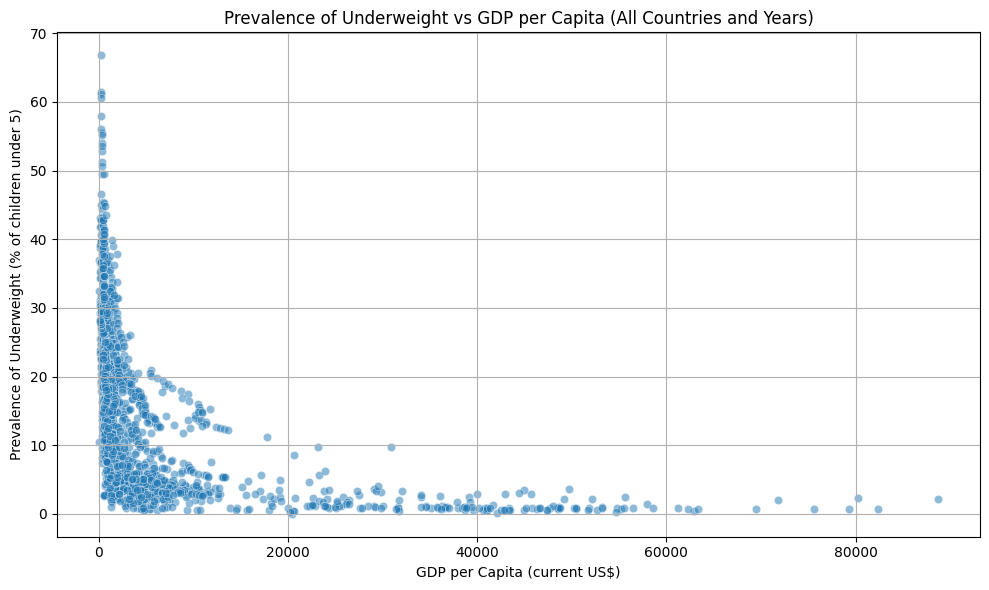

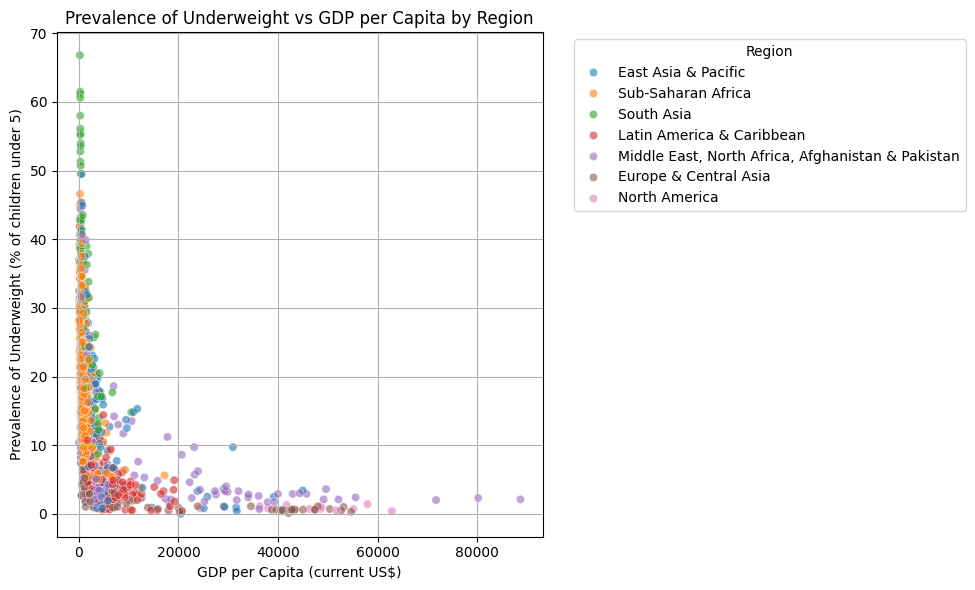

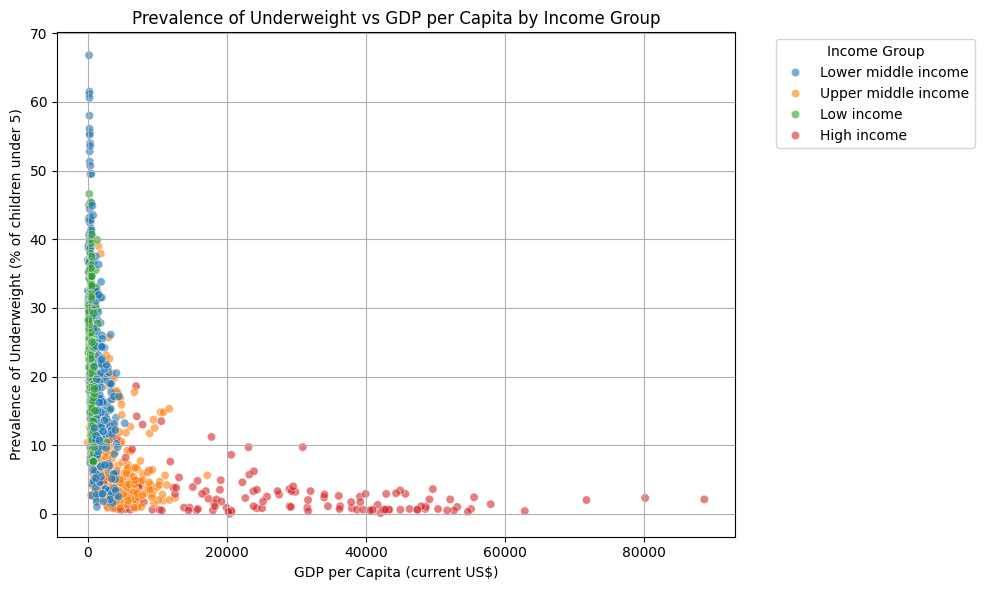

In [4]:
import pandas as pnd  # Import pandas library for data manipulation
import matplotlib.pyplot as mplt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for statistical data visualization

# Load GDP and underweight prevalence data
underweight_df = pnd.read_csv("Prevalence_of_underweight.csv", skiprows=4)  # Read underweight data, skip first 4 rows of metadata
gdp_df = pnd.read_csv("GDP_per_Capita.csv", skiprows=4)  # Read GDP data, skip first 4 rows of metadata
metadata_df = pnd.read_csv("Metadata_Country_Prevalence_of_underweight.csv")  # Read country metadata

# Turn GDP and underweight data to long format
gdp_long = gdp_df.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="GDP")  # Reshape GDP data to long format
underweight_long = underweight_df.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Underweight")  # Reshape underweight data to long format

# Merge GDP and underweight data
merged_df = pnd.merge(gdp_long, underweight_long, on=["Country Code", "Year"])  # Merge GDP and underweight data on Country Code and Year

# Merge with metadata
metadata_df = metadata_df[["Country Code", "Region", "IncomeGroup"]]  # Select only relevant metadata columns
merged_df = pnd.merge(merged_df, metadata_df, on="Country Code")  # Merge metadata with main dataset

# Convert year and indicators to numeric and drop missing values
merged_df["Year"] = pnd.to_numeric(merged_df["Year"], errors="coerce")  # Convert Year column to numeric, invalid values become NaN
merged_df["GDP"] = pnd.to_numeric(merged_df["GDP"], errors="coerce")  # Convert GDP column to numeric, invalid values become NaN
merged_df["Underweight"] = pnd.to_numeric(merged_df["Underweight"], errors="coerce")  # Convert Underweight column to numeric, invalid values become NaN
merged_df.dropna(subset=["GDP", "Underweight"], inplace=True)  # Remove rows with missing GDP or Underweight values

# Plot 1: Overall scatter plot
mplt.figure(figsize=(10, 6))  # Create figure with specified size
sns.scatterplot(data=merged_df, x="GDP", y="Underweight", alpha=0.5)  # Create scatter plot with transparency
mplt.title("Prevalence of Underweight vs GDP per Capita (All Countries and Years)")  # Set plot title
mplt.xlabel("GDP per Capita (current US$)")  # Set x-axis label
mplt.ylabel("Prevalence of Underweight (% of children under 5)")  # Set y-axis label to indicate percentage
mplt.grid(True)  # Add grid to plot
mplt.tight_layout()  # Adjust layout to prevent clipping
mplt.savefig("scatter_overall.png")  # Save plot as PNG file

# Plot 2: By Region
mplt.figure(figsize=(10, 6))  # Create new figure with specified size
sns.scatterplot(data=merged_df, x="GDP", y="Underweight", hue="Region", alpha=0.6)  # Create scatter plot colored by region
mplt.title("Prevalence of Underweight vs GDP per Capita by Region")  # Set plot title
mplt.xlabel("GDP per Capita (current US$)")  # Set x-axis label
mplt.ylabel("Prevalence of Underweight (% of children under 5)")  # Set y-axis label
mplt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside plot area
mplt.grid(True)  # Add grid to plot
mplt.tight_layout()  # Adjust layout to prevent clipping
mplt.savefig("scatter_by_region.png")  # Save plot as PNG file

# Plot 3: By Income Group
mplt.figure(figsize=(10, 6))  # Create new figure with specified size
sns.scatterplot(data=merged_df, x="GDP", y="Underweight", hue="IncomeGroup", alpha=0.6)  # Create scatter plot colored by income group
mplt.title("Prevalence of Underweight vs GDP per Capita by Income Group")  # Set plot title
mplt.xlabel("GDP per Capita (current US$)")  # Set x-axis label to indicate currency
mplt.ylabel("Prevalence of Underweight (% of children under 5)")  # Set y-axis label
mplt.legend(title="Income Group", bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside plot area
mplt.grid(True)  # Add grid to plot to enhance readability
mplt.tight_layout()  # Adjust layout to prevent clipping
mplt.savefig("scatter_by_income.png")  # Save plot as PNG file

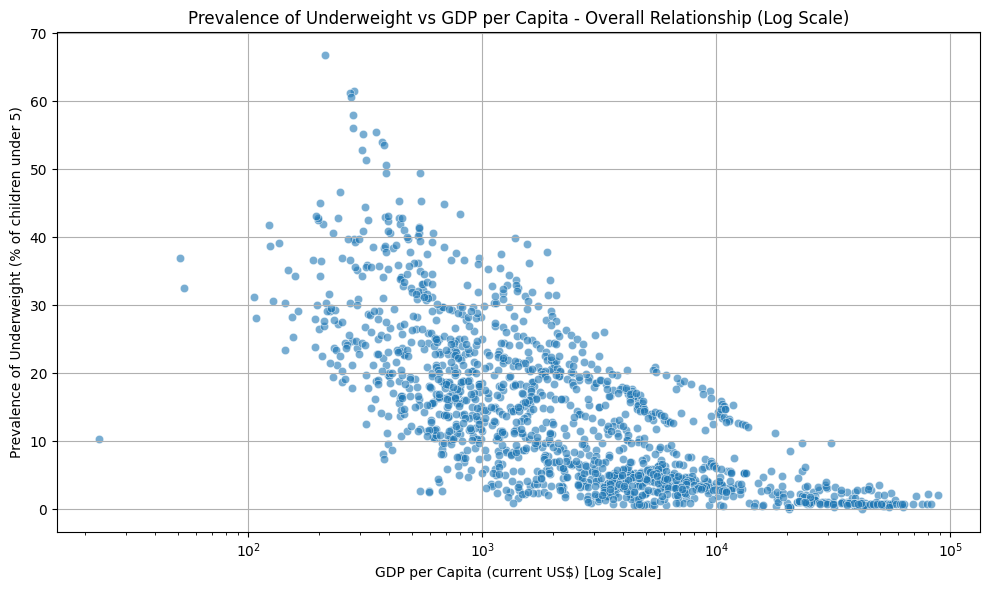

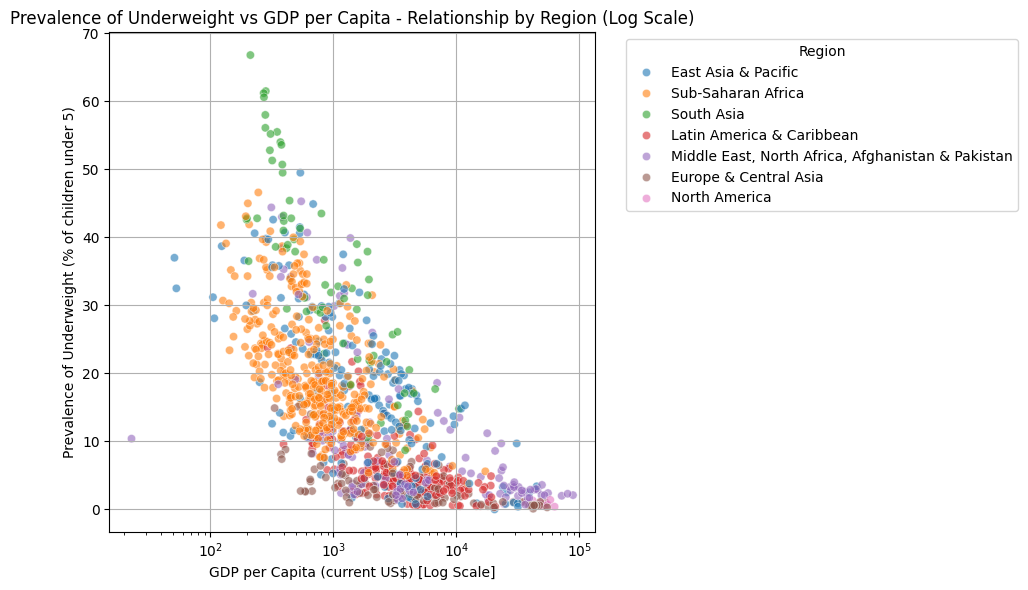

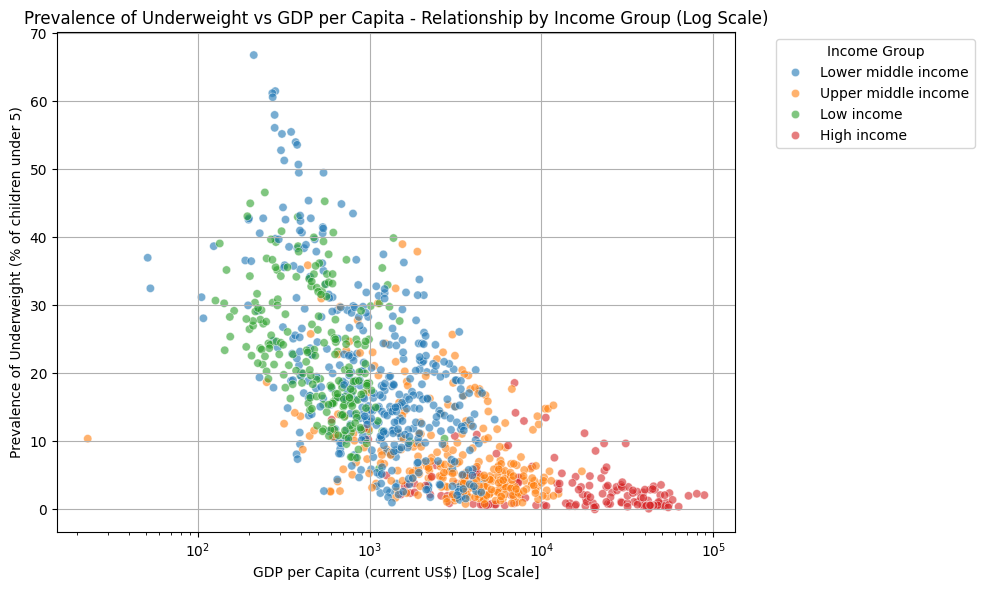

COMPARATIVE DATA ANALYSIS: Descriptive Statistics vs Income Category Analysis
+-------+----------+-----------+---------------+    +---------------------+---------------+---------------------+
|       |     Year |       GDP |   Underweight |    | Income Category     | GDP Range     | Underweight Range   |
+=======+==========+===========+===============+    +=====================+===============+=====================+
| count | 1468.000 |  1468.000 |      1468.000 |    | Low-Income          | < $767        | > 21.0%             |
+-------+----------+-----------+---------------+    +---------------------+---------------+---------------------+
| mean  | 2007.958 |  6701.480 |        14.126 |    | Lower-Middle Income | $767 - $1958  | 11.9% - 21.0%       |
+-------+----------+-----------+---------------+    +---------------------+---------------+---------------------+
| std   |    9.729 | 12227.563 |        11.692 |    | Upper-Middle Income | $1958 - $5755 | 4.0% - 11.9%        |
+-------+-

In [5]:
"""Using log scale for GDP to better visualize wide range of values"""
# Import necessary libraries for data analysis and visualization
import pandas as pnd  # For data manipulation and analysis with DataFrame functionality
import matplotlib.pyplot as mplt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For making statistical graphics more attractive and informative
from tabulate import tabulate  # For presenting data in well-formatted table structures

# Load and prepare the datasets for analysis of GDP and underweight prevalence
underweight_df = pnd.read_csv("Prevalence_of_underweight.csv", skiprows=4)  # Skip metadata rows to get clean data
gdp_df = pnd.read_csv("GDP_per_Capita.csv", skiprows=4)  # Skip initial rows that contain explanatory text
metadata_df = pnd.read_csv("Metadata_Country_Prevalence_of_underweight.csv")  # Country classification information

# Reshape data from wide format to long format for easier analysis and merging
gdp_long = gdp_df.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="GDP")
underweight_long = underweight_df.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Underweight")

# Merge all datasets together to create comprehensive analysis dataset
merged_df = pnd.merge(gdp_long, underweight_long, on=["Country Code", "Year"])  # Combine GDP and underweight data
merged_df = pnd.merge(merged_df, metadata_df[["Country Code", "Region", "IncomeGroup"]], on="Country Code")  # Add region and income group info

# Clean the data by converting to proper numeric types and removing missing values
for col in ["Year", "GDP", "Underweight"]:  # Process each numerical column separately
    merged_df[col] = pnd.to_numeric(merged_df[col], errors="coerce")  # Convert to numbers, invalid becomes NaN
merged_df.dropna(subset=["GDP", "Underweight"], inplace=True)  # Remove rows with missing important data

# Create multiple scatter plots to visualize relationship between GDP and underweight prevalence
plot_configs = [  # Define different visualization scenarios to create
    {"hue": None, "title": "Overall Relationship", "filename": "scatter_overall_log.png"},
    {"hue": "Region", "title": "Relationship by Region", "filename": "scatter_by_region_log.png"},
    {"hue": "IncomeGroup", "title": "Relationship by Income Group", "filename": "scatter_by_income_log.png"}
]

# Generate each plot using a loop to avoid code repetition and display them
for config in plot_configs:
    mplt.figure(figsize=(10, 6))  # Set consistent figure size for all plots
    sns.scatterplot(data=merged_df, x="GDP", y="Underweight", hue=config["hue"], alpha=0.6)  # Create scatter plot
    mplt.xscale("log")  # Use logarithmic scale for GDP to handle wide value range effectively
    mplt.title(f"Prevalence of Underweight vs GDP per Capita - {config['title']} (Log Scale)")  # Descriptive title
    mplt.xlabel("GDP per Capita (current US$) [Log Scale]")  # Clear x-axis label with scale information
    mplt.ylabel("Prevalence of Underweight (% of children under 5)")  # y-axis label explaining the metric
    mplt.grid(True)  # Add grid lines for easier value reading and comparison
    if config["hue"]:  # Only add legend if we're coloring by a category
        mplt.legend(title=config["hue"].replace("Group", " Group"), bbox_to_anchor=(1.05, 1), loc='upper left')
    mplt.tight_layout()  # Automatically adjust spacing to prevent label cutting
    mplt.savefig(config["filename"])  # Save each plot as a separate image file
    mplt.show()  # Display the chart on screen so user can see it immediately

# Calculate descriptive statistics for the main dataset variables
stats_summary = merged_df[["Year", "GDP", "Underweight"]].describe()  # Calculate basic statistical measures

# Create simplified income category analysis based on percentile ranges
gdp_percentiles = merged_df["GDP"].quantile([0.25, 0.5, 0.75, 0.95])  # Get key percentile values for GDP
underweight_percentiles = merged_df["Underweight"].quantile([0.25, 0.5, 0.75, 0.95])  # Get same percentiles for underweight

# Create the simplified income category analysis table as requested
income_analysis_data = [
    ["Low-Income", f"< ${gdp_percentiles[0.25]:.0f}", f"> {underweight_percentiles[0.75]:.1f}%"],
    ["Lower-Middle Income", f"${gdp_percentiles[0.25]:.0f} - ${gdp_percentiles[0.5]:.0f}", 
     f"{underweight_percentiles[0.5]:.1f}% - {underweight_percentiles[0.75]:.1f}%"],
    ["Upper-Middle Income", f"${gdp_percentiles[0.5]:.0f} - ${gdp_percentiles[0.75]:.0f}", 
     f"{underweight_percentiles[0.25]:.1f}% - {underweight_percentiles[0.5]:.1f}%"],
    ["High-Income", f"> ${gdp_percentiles[0.75]:.0f}", f"< {underweight_percentiles[0.25]:.1f}%"]
]

# Display both tables side by side for comprehensive data overview
print("COMPARATIVE DATA ANALYSIS: Descriptive Statistics vs Income Category Analysis")

# Prepare both tables for side-by-side display
stats_table = tabulate(stats_summary, headers='keys', tablefmt='grid', floatfmt=".3f").split('\n')
income_table = tabulate(income_analysis_data, headers=["Income Category", "GDP Range", "Underweight Range"], 
                       tablefmt='grid').split('\n')

# Display tables side by side with proper alignment
max_lines = max(len(stats_table), len(income_table))
for i in range(max_lines):
    left_line = stats_table[i] if i < len(stats_table) else " " * len(stats_table[0])
    right_line = income_table[i] if i < len(income_table) else " " * len(income_table[0])
    print(f"{left_line}    {right_line}")

'compare_scales_incomegroup.png'

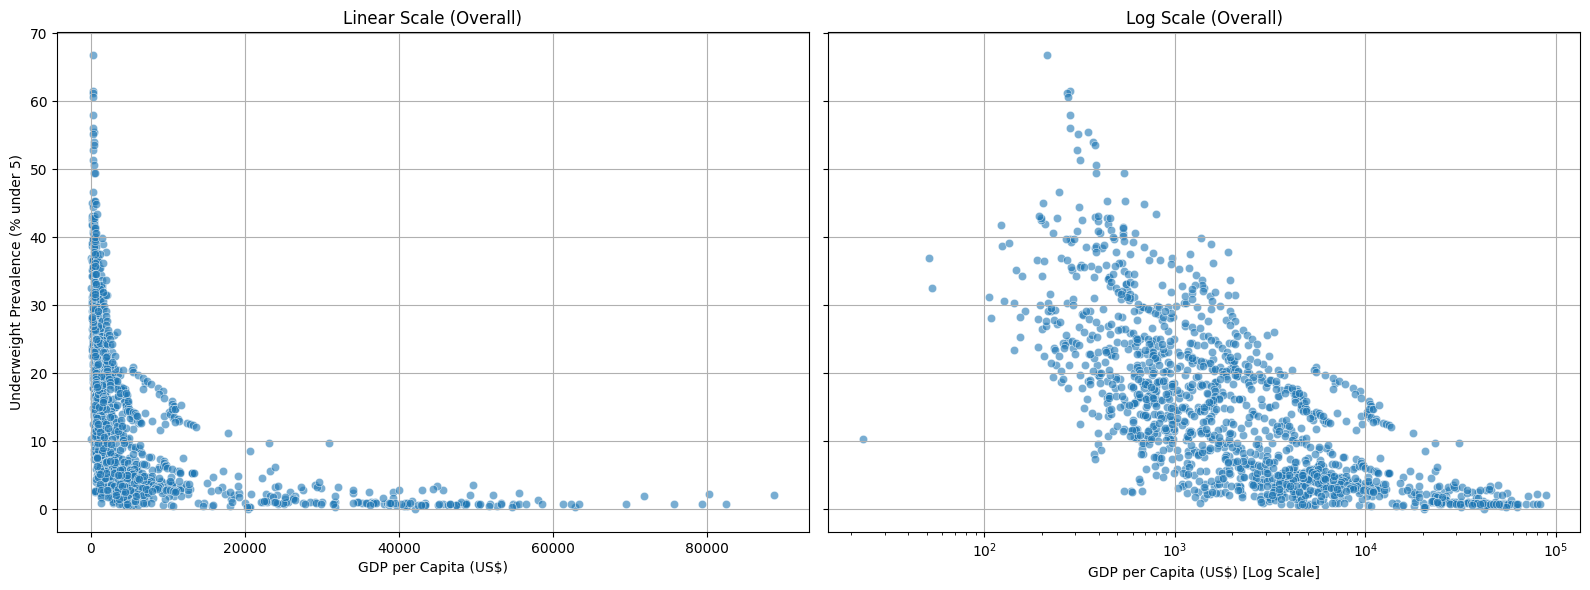

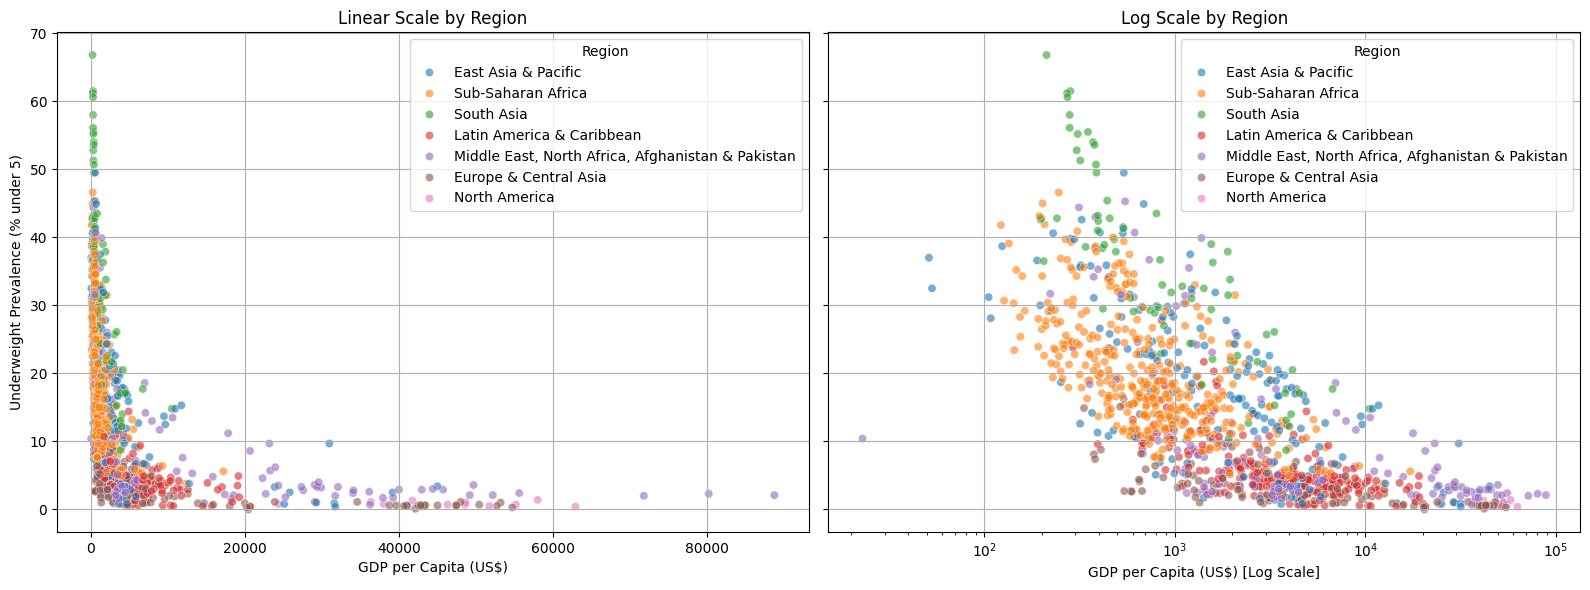

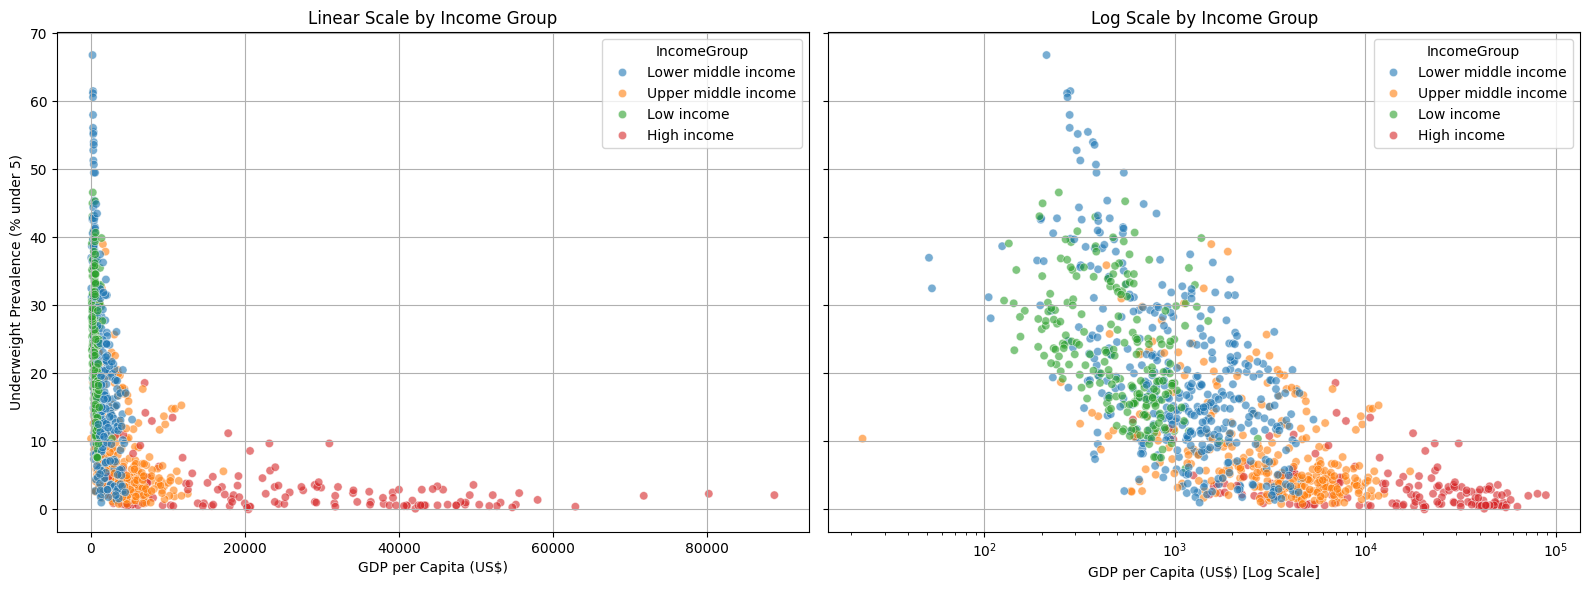

In [6]:
# Comparing linear vs log scale visualizations
import pandas as pnd  # Import pandas library with alias 'pnd' for data manipulation
import matplotlib.pyplot as mplt  # Import matplotlib.pyplot with alias 'mplt' for plotting
import seaborn as sns  # Import seaborn for statistical data visualization

# Load GDP and underweight prevalence data
underweight_df = pnd.read_csv("Prevalence_of_underweight.csv", skiprows=4)  # Read underweight prevalence data, skip first 4 metadata rows
gdp_df = pnd.read_csv("GDP_per_Capita.csv", skiprows=4)  # Read GDP per capita data, skip first 4 metadata rows
metadata_df = pnd.read_csv("Metadata_Country_Prevalence_of_underweight.csv")  # Read country metadata information

# Turn GDP and underweight data to long format
gdp_long = gdp_df.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="GDP")  # Reshape GDP data from wide to long format
underweight_long = underweight_df.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Underweight")  # Reshape underweight data from wide to long format

# Merge GDP and underweight data
merged_df = pnd.merge(gdp_long, underweight_long, on=["Country Code", "Year"])  # Merge GDP and underweight datasets on Country Code and Year

# Merge with metadata
metadata_df = metadata_df[["Country Code", "Region", "IncomeGroup"]]  # Select only relevant metadata columns
merged_df = pnd.merge(merged_df, metadata_df, on="Country Code")  # Merge metadata with main dataset on Country Code

# Convert year and indicators to numeric and drop missing values
merged_df["Year"] = pnd.to_numeric(merged_df["Year"], errors="coerce")  # Convert Year column to numeric type, invalid values become NaN
merged_df["GDP"] = pnd.to_numeric(merged_df["GDP"], errors="coerce")  # Convert GDP column to numeric type, invalid values become NaN
merged_df["Underweight"] = pnd.to_numeric(merged_df["Underweight"], errors="coerce")  # Convert Underweight column to numeric type, invalid values become NaN
merged_df.dropna(subset=["GDP", "Underweight"], inplace=True)  # Remove rows with missing GDP or Underweight values

# Function to create comparison plots
def compare_scales(data, hue=None, title_suffix=""):  # Define function to create side-by-side linear and log scale plots
    fig, axes = mplt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Create subplot with 1 row, 2 columns, sharing y-axis

    # Linear scale
    sns.scatterplot(data=data, x="GDP", y="Underweight", hue=hue, alpha=0.6, ax=axes[0])  # Create scatter plot on left subplot with linear scale
    axes[0].set_title(f"Linear Scale {title_suffix}")  # Set title for linear scale plot
    axes[0].set_xlabel("GDP per Capita (US$)")  # Set x-axis label for linear scale plot
    axes[0].set_ylabel("Underweight Prevalence (% under 5)")  # Set y-axis label for linear scale plot
    axes[0].grid(True)  # Add grid to linear scale plot

    # Log scale
    sns.scatterplot(data=data, x="GDP", y="Underweight", hue=hue, alpha=0.6, ax=axes[1])  # Create scatter plot on right subplot
    axes[1].set_xscale("log")  # Set x-axis to logarithmic scale for right subplot
    axes[1].set_title(f"Log Scale {title_suffix}")  # Set title for log scale plot
    axes[1].set_xlabel("GDP per Capita (US$) [Log Scale]")  # Set x-axis label for log scale plot
    axes[1].set_ylabel("Underweight Prevalence (% under 5)")  # Set y-axis label for log scale plot (shared with left plot)
    axes[1].grid(True)  # Add grid to log scale plot

    mplt.tight_layout()  # Adjust layout to prevent overlapping elements
    filename = f"compare_scales{('_' + hue.lower()) if hue else '_overall'}.png"  # Generate filename based on hue parameter
    mplt.savefig(filename)  # Save the combined plot as PNG file
    return filename  # Return the saved filename

# Generate comparison plots
compare_scales(merged_df, title_suffix="(Overall)")  # Create comparison plots for overall data without grouping
compare_scales(merged_df, hue="Region", title_suffix="by Region")  # Create comparison plots grouped by region
compare_scales(merged_df, hue="IncomeGroup", title_suffix="by Income Group")  # Create comparison plots grouped by income group

Question 4:
Obtain daily prices for two ETFs, SPY and TLT, which track the S&P 500 index and the long-term Treasury Bond. Select the adjusted closing prices. Plot the two time series during 12/31/2013 – 08/31/2015 and make them comparable by starting from prices of $100 on the first day in 12/31/2013 – 08/31/2015. Calculate daily returns, r(t) = p(t)/p(t-1)-1, for each trading day in the same time period as above. Calculate the average, min, and max daily return for each of the two ETFs during the time period and express these as percentages.
Expected Result: A graph, 6 numbers, and qualitative answers.

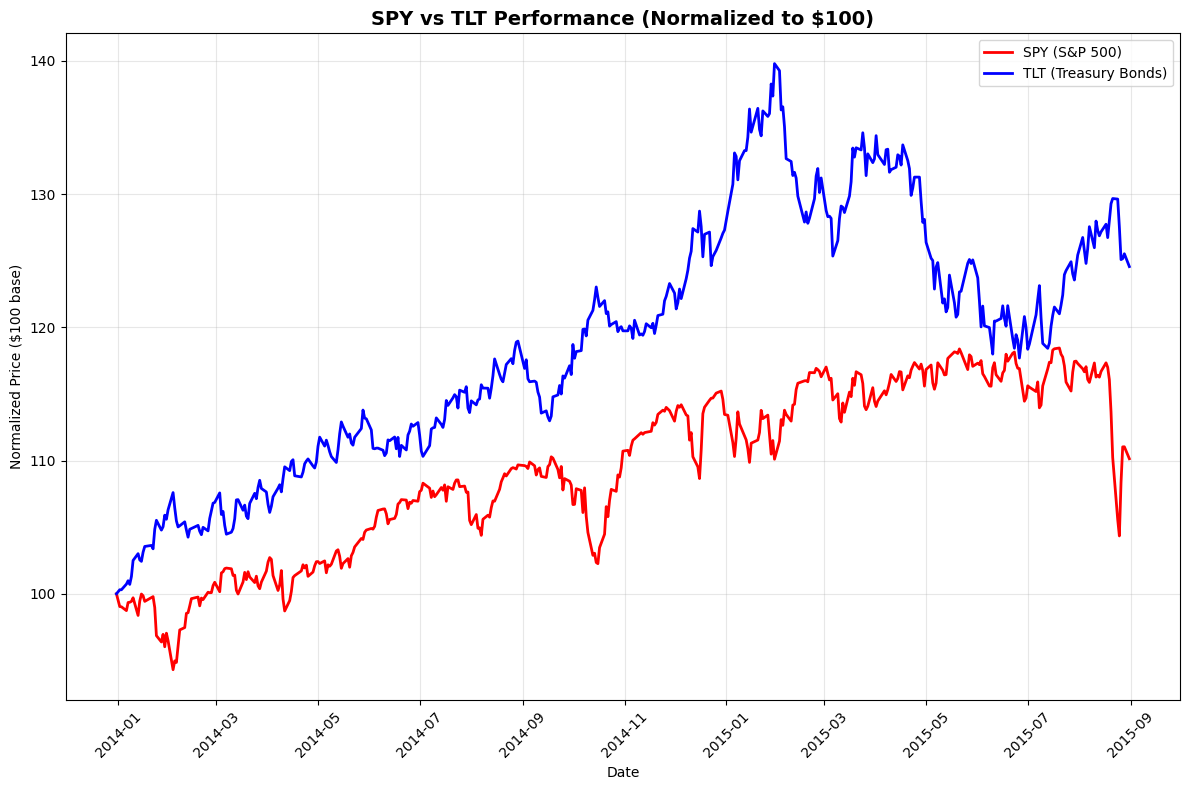

+----------------------+-----------+-----------+
|            Statistic |   SPY (%) |   TLT (%) |
+======================+===========+===========+
| Average Daily Return |   0.0263% |   0.0560% |
+----------------------+-----------+-----------+
| Minimum Daily Return |  -4.2107% |  -2.4325% |
+----------------------+-----------+-----------+
| Maximum Daily Return |   3.8394% |   2.6469% |
+----------------------+-----------+-----------+
|   Standard Deviation |   0.8007% |   0.8419% |
+----------------------+-----------+-----------+
|      25th Percentile |  -0.3915% |  -0.4949% |
+----------------------+-----------+-----------+
|               Median |   0.0546% |   0.1003% |
+----------------------+-----------+-----------+
|      75th Percentile |   0.4764% |   0.6242% |
+----------------------+-----------+-----------+
|  Total Return Period |  10.1396% |  24.5632% |
+----------------------+-----------+-----------+


In [7]:
import pandas as pnd  # For data manipulation and analysis with tables
import matplotlib.pyplot as mplt  # For creating charts and visualizations
from tabulate import tabulate  # For displaying data in formatted tables

my_spy_data = pnd.read_csv('SPY.csv', parse_dates=['Date'], index_col='Date')['2013-12-31':'2015-08-31']  # Load SPY data, parse dates, set index, and filter date range
my_tlt_data = pnd.read_csv('TLT.csv', parse_dates=['Date'], index_col='Date')['2013-12-31':'2015-08-31']  # Load TLT data, parse dates, set index, and filter date range

spy_norm = (my_spy_data['Adj Close'] / my_spy_data['Adj Close'].iloc[0]) * 100  # Normalize SPY prices to start at 100 for comparison
tlt_norm = (my_tlt_data['Adj Close'] / my_tlt_data['Adj Close'].iloc[0]) * 100  # Normalize TLT prices to start at 100 for comparison

mplt.figure(figsize=(12, 8))  # Create a new figure for plotting with specified size
mplt.plot(spy_norm, label='SPY (S&P 500)', linewidth=2, color='red')  # Plot normalized SPY prices with label and styling
mplt.plot(tlt_norm, label='TLT (Treasury Bonds)', linewidth=2, color='blue')  # Plot normalized TLT prices with label and styling
mplt.title('SPY vs TLT Performance (Normalized to $100)', fontsize=14, fontweight='bold')  # Set chart title with formatting
mplt.xlabel('Date')  # Label the x-axis
mplt.ylabel('Normalized Price ($100 base)')  # Label the y-axis
mplt.grid(True, alpha=0.3)  # Add grid with transparency
mplt.legend()  # Show legend for line identification
mplt.xticks(rotation=45)  # Rotate x-axis labels for readability
mplt.tight_layout()  # Adjust layout to prevent label clipping
mplt.show()  # Display the chart

def calculate_stats(returns, prices):  # Define function to calculate performance statistics
    """Calculate comprehensive statistics for returns and prices"""  # Function docstring
    return {  # Return dictionary of calculated metrics
        'Average Daily Return': returns.mean() * 100,  # Calculate mean daily return in percentage
        'Minimum Daily Return': returns.min() * 100,   # Calculate minimum daily return in percentage
        'Maximum Daily Return': returns.max() * 100,   # Calculate maximum daily return in percentage
        'Standard Deviation': returns.std() * 100,     # Calculate volatility (standard deviation) in percentage
        '25th Percentile': returns.quantile(0.25) * 100,  # Calculate 25th percentile of returns
        'Median': returns.median() * 100,              # Calculate median daily return
        '75th Percentile': returns.quantile(0.75) * 100,  # Calculate 75th percentile of returns
        'Total Return Period': ((prices.iloc[-1] / prices.iloc[0]) - 1) * 100  # Calculate total return over period
    }

spy_stats = calculate_stats(my_spy_data['Adj Close'].pct_change().dropna(), my_spy_data['Adj Close'])  # Calculate statistics for SPY
tlt_stats = calculate_stats(my_tlt_data['Adj Close'].pct_change().dropna(), my_tlt_data['Adj Close'])  # Calculate statistics for TLT

table_data = [[stat, f"{spy_stats[stat]:.4f}%", f"{tlt_stats[stat]:.4f}%"] for stat in spy_stats]  # Prepare formatted table data
print(tabulate(table_data, headers=['Statistic', 'SPY (%)', 'TLT (%)'], tablefmt='grid', stralign='right'))  # Display formatted comparison table

Question 5:
Use data from the World Bank Indicators for 2023 to study the relationship between Fertility rate, total (births per woman) versus GDP per capita PPP (current international $). Make a carefully labelled graph with one dot per country. Estimate the correlation coefficient and give your interpretation.

Expected Results: Graph, Correlation, and qualitative answers

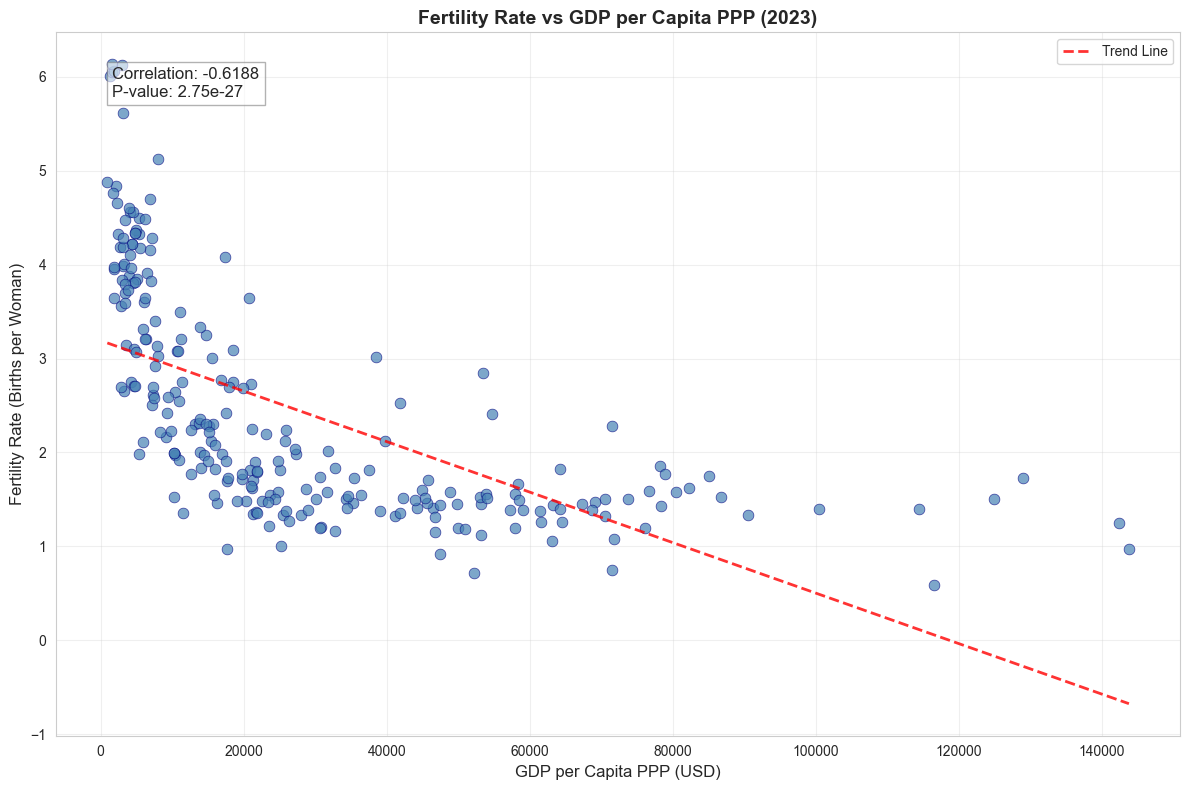

In [8]:
# Import required libraries
import pandas as pnd  # Data manipulation and analysis
import numpy as nmp  # Numerical operations and mathematical functions
import matplotlib.pyplot as mplt  # Basic plotting and visualization
import seaborn as sns  # Enhanced statistical visualizations
from scipy.stats import pearsonr  # Statistical correlation analysis

# Load datasets, skipping metadata rows
my_fertility_df = pnd.read_csv('Fertility_rate.csv', skiprows=4)  # Load fertility rate data
my_gdp_df = pnd.read_csv('GDP_per_capita_PPP.csv', skiprows=4)  # Load GDP per capita PPP data
fertility_df = my_fertility_df.copy()  # Copy fertility data
gdp_df = my_gdp_df.copy()  # Copy GDP data

# Extract 2023 data and rename columns
fert_2023 = fertility_df[['Country Name', 'Country Code', '2023']].rename(columns={'2023': 'Fert_Rate'})  # Fertility data for 2023 
gdp_2023 = gdp_df[['Country Name', 'Country Code', '2023']].rename(columns={'2023': 'GDP_PPP'})  # GDP data for 2023

# Convert to numeric, handling errors
fert_2023['Fert_Rate'] = pnd.to_numeric(fert_2023['Fert_Rate'], errors='coerce')  # Convert fertility to numeric 
gdp_2023['GDP_PPP'] = pnd.to_numeric(gdp_2023['GDP_PPP'], errors='coerce')  # Convert GDP to numeric

# Merge datasets on country code
merged = pnd.merge(fert_2023, gdp_2023, on='Country Code').dropna()  # Merge and drop missing values
merged = merged.rename(columns={'Country Name_x': 'Country'})[['Country', 'Fert_Rate', 'GDP_PPP']]  # Final columns selection

# Set plot style and size
mplt.figure(figsize=(12, 8))  # Set figure size for better visibility
sns.set_style("whitegrid")  # Set seaborn style for better aesthetics

# Create scatter plot (no log scale)
mplt.scatter(merged['GDP_PPP'], merged['Fert_Rate'], alpha=0.7, s=60, color='steelblue', edgecolor='navy', linewidth=0.5)  # Scatter plot customization

# Add labels and title
mplt.xlabel('GDP per Capita PPP (USD)', fontsize=12)  # X-axis label for clarity
mplt.ylabel('Fertility Rate (Births per Woman)', fontsize=12)  # Y-axis label for clarity
mplt.title('Fertility Rate vs GDP per Capita PPP (2023)', fontsize=14, fontweight='bold')  # Title for the plot

# Add linear trend line
slope, intercept = nmp.polyfit(merged['GDP_PPP'], merged['Fert_Rate'], 1)  # Fit line to data to get slope and corresponding correlation
x_trend = nmp.linspace(merged['GDP_PPP'].min(), merged['GDP_PPP'].max(), 100)  # X values
mplt.plot(x_trend, slope * x_trend + intercept, "r--", alpha=0.8, linewidth=2, label='Trend Line')  # Plot line with label
mplt.legend()  # Show legend

# Calculate correlation
corr_linear, p_val = pearsonr(merged['GDP_PPP'], merged['Fert_Rate'])  # Pearson correlation calculation

# Annotate correlation on chart
corr_text = f"Correlation: {corr_linear:.4f}\nP-value: {p_val:.2e}"  # Text to display
mplt.text(0.05, 0.95, corr_text, transform=mplt.gca().transAxes, fontsize=12, 
          verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))  # Add text box to plot

# Final plot adjustments
mplt.grid(True, alpha=0.3)  # Add grid
mplt.tight_layout()  # Adjust layout
mplt.show()  # Display plot

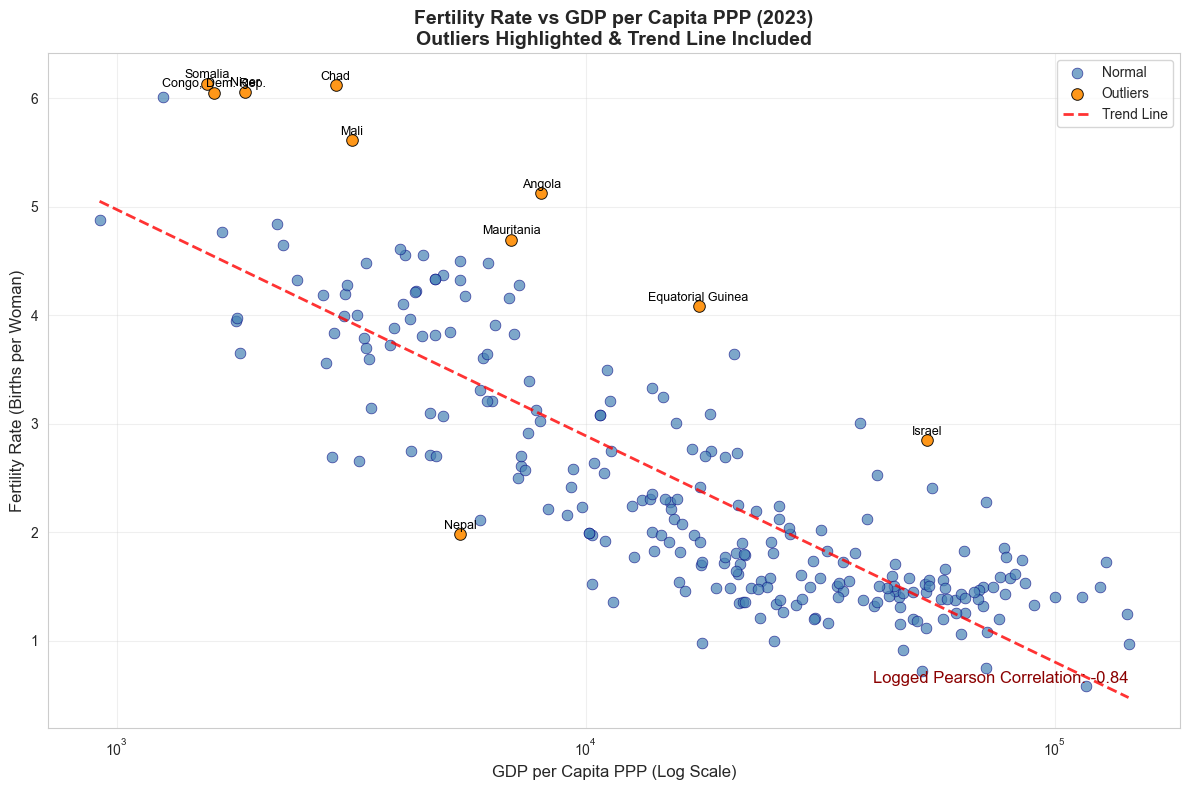

Linear Correlation: -0.6188
Log-Linear Correlation: -0.8370
P-value: 1.40e-65
Correlation is very strong and negative
Higher GDP correlates with lower fertility rates.


In [9]:
"""
Logged Fertility vs GDP Chart showing how the trend looks
"""
# Import required libraries for data analysis and visualization
import pandas as pnd  # Data manipulation and analysis
import numpy as nmp  # Numerical operations and mathematical functions
import matplotlib.pyplot as mplt  # Basic plotting and visualization
import seaborn as sns  # Enhanced statistical visualizations
from scipy.stats import pearsonr  # Statistical correlation analysis

# Load fertility rate data, skipping metadata rows
fert_df = pnd.read_csv('Fertility_rate.csv', skiprows=4)  # Load fertility rate data, skip first 4 metadata rows

# Load GDP per capita PPP data, skipping metadata rows
gdp_df = pnd.read_csv('GDP_per_capita_PPP.csv', skiprows=4)  # Load GDP per capita PPP data, skip first 4 metadata rows

# Extract 2023 data and rename columns
fert_2023 = fert_df[['Country Name', 'Country Code', '2023']].rename(columns={'2023': 'Fert_Rate'})  # Select 2023 fertility data and rename column
gdp_2023 = gdp_df[['Country Name', 'Country Code', '2023']].rename(columns={'2023': 'GDP_PPP'})  # Select 2023 GDP data and rename column

# Convert to numeric, handling errors
fert_2023['Fert_Rate'] = pnd.to_numeric(fert_2023['Fert_Rate'], errors='coerce')  # Convert fertility rates to numeric, invalid values become NaN
gdp_2023['GDP_PPP'] = pnd.to_numeric(gdp_2023['GDP_PPP'], errors='coerce')  # Convert GDP values to numeric, invalid values become NaN

# Merge datasets on country code
merged = pnd.merge(fert_2023, gdp_2023, on='Country Code').dropna()  # Merge datasets by country code and remove rows with missing data
merged = merged.rename(columns={'Country Name_x': 'Country'})[['Country', 'Fert_Rate', 'GDP_PPP']]  # Rename country column and select final columns

# Compute log of GDP for regression analysis
log_gdp = nmp.log(merged['GDP_PPP'])  # Calculate natural logarithm of GDP values

# Fit linear regression model on log GDP
slope, intercept = nmp.polyfit(log_gdp, merged['Fert_Rate'], 1)  # Fit linear regression line to log-GDP vs fertility data

# Predict fertility rate using regression model
merged['Predicted'] = slope * log_gdp + intercept  # Compute predicted fertility rate from regression

# Calculate absolute residuals between actual and predicted fertility rate
merged['Residual'] = (merged['Fert_Rate'] - merged['Predicted']).abs()  # Compute absolute deviation from trend

# Identify top 10 outliers based on residuals
outliers = merged.nlargest(10, 'Residual')  # Select top 10 countries with largest deviation from trend

# Set plot style and size
mplt.figure(figsize=(12, 8))  # Create figure with specified dimensions
sns.set_style("whitegrid")  # Set seaborn white grid style for plots

# Plot normal countries in blue
normal = merged[~merged['Country'].isin(outliers['Country'])]  # Filter out outliers from dataset
mplt.scatter(normal['GDP_PPP'], normal['Fert_Rate'], alpha=0.7, s=60,
             color='steelblue', edgecolor='navy', linewidth=0.5, label='Normal')  # Plot normal countries

# Plot outlier countries in orange
mplt.scatter(outliers['GDP_PPP'], outliers['Fert_Rate'], alpha=0.9, s=70,
             color='darkorange', edgecolor='black', linewidth=0.7, label='Outliers')  # Plot outlier countries

# Add country labels to outlier points
for i in range(len(outliers)):  # Loop through each outlier
    x = outliers.iloc[i]['GDP_PPP']  # Get GDP value
    y = outliers.iloc[i]['Fert_Rate']  # Get fertility rate
    label = outliers.iloc[i]['Country']  # Get country name
    mplt.text(x, y + 0.05, label, fontsize=9, ha='center', color='black')  # Annotate point with country name

# Generate x values for trend line using log scale
x_trend = nmp.logspace(nmp.log10(merged['GDP_PPP'].min()), nmp.log10(merged['GDP_PPP'].max()), 100)  # Generate x values for trend line

# Plot regression trend line
mplt.plot(x_trend, slope * nmp.log(x_trend) + intercept, "r--", alpha=0.8, linewidth=2, label='Trend Line')  # Plot regression line

# Set x-axis to logarithmic scale
mplt.xscale('log')  # Apply logarithmic scale to x-axis

# Add labels and title
mplt.xlabel('GDP per Capita PPP (Log Scale)', fontsize=12)  # Set x-axis label
mplt.ylabel('Fertility Rate (Births per Woman)', fontsize=12)  # Set y-axis label
mplt.title('Fertility Rate vs GDP per Capita PPP (2023)\nOutliers Highlighted & Trend Line Included', fontsize=14, fontweight='bold')  # Set plot title

# Calculate correlations
corr_linear = merged['GDP_PPP'].corr(merged['Fert_Rate'])  # Calculate linear Pearson correlation between GDP and fertility
corr_log, p_val = pearsonr(log_gdp, merged['Fert_Rate'])  # Calculate correlation between log-GDP and fertility with p-value

# Add legend and grid
mplt.legend()  # Display legend
mplt.grid(True, alpha=0.3)  # Add grid with transparency
mplt.tight_layout()  # Adjust layout to prevent clipping
# Add correlation coefficient as text on the plot
mplt.text(x=merged['GDP_PPP'].max(), y=merged['Fert_Rate'].min(),
          s=f'Logged Pearson Correlation: {corr_log:.2f}', fontsize=12,
          ha='right', va='bottom', color='darkred')  # Display correlation on bottom-right corner
mplt.show()  # Display the plot


# Print results
print(f"Linear Correlation: {corr_linear:.4f}")  # Display linear correlation coefficient
print(f"Log-Linear Correlation: {corr_log:.4f}")  # Display log-linear correlation coefficient
print(f"P-value: {p_val:.2e}")  # Display statistical significance p-value in scientific notation

# Interpret correlation strength
def corr_strength(corr):  # Define function to interpret correlation strength
    abs_corr = abs(corr)  # Get absolute value of correlation
    if abs_corr >= 0.8: return "very strong"  # Very strong correlation threshold
    elif abs_corr >= 0.6: return "strong"  # Strong correlation threshold
    elif abs_corr >= 0.4: return "moderate"  # Moderate correlation threshold
    elif abs_corr >= 0.2: return "weak"  # Weak correlation threshold
    else: return "very weak"  # Very weak correlation threshold

# Print interpretation
print(f"Correlation is {corr_strength(corr_log)} and {'negative' if corr_log < 0 else 'positive'}")  # Display correlation strength and direction
print("Higher GDP correlates with lower fertility rates.")  # Summary interpretation of economic and demographic relationship

Question 6:
Download the data for the “Happy Planet Index” from hpi_data and “Corruption Perceptions Index” from https://www.transparency.org/en/cpi/2016/index/nzl. Both datasets are available as Excel spreadsheets. Find matching countries for both indices and create a carefully labeled scatter plot of HPI against CPI to demonstrate the relationship, using ranks in both cases. Are there any countries that stand out as being unusual?

Expected results: Graph, qualitativeanswers

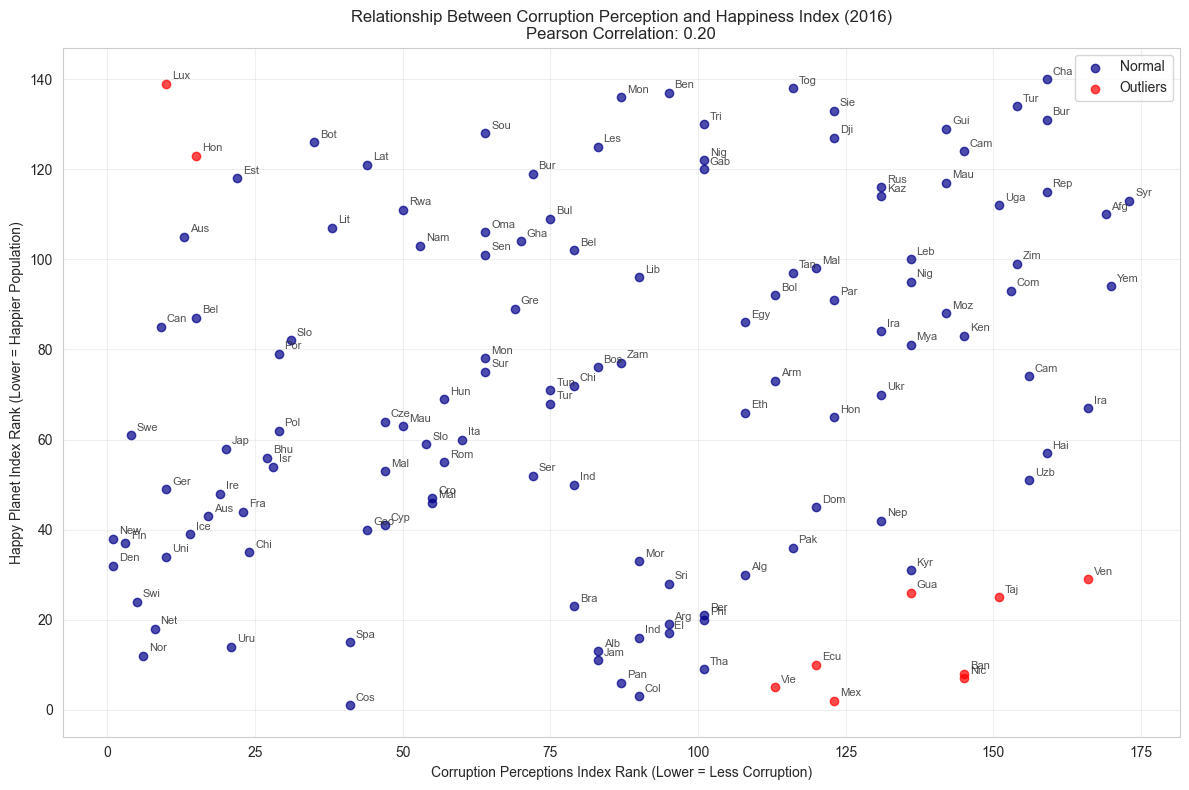

TOP 10 COUNTRIES WITH LARGEST DIFFERENCE BETWEEN HPI AND CPI RANKS
+-----+------------+------------+------------+-------------+
|     |    Country |   HPI Rank |   CPI Rank |   Deviation |
+=====+============+============+============+=============+
|  86 |  Nicaragua |          7 |        145 |         138 |
+-----+------------+------------+------------+-------------+
|   7 | Bangladesh |          8 |        145 |         137 |
+-----+------------+------------+------------+-------------+
| 127 |  Venezuela |         29 |        166 |         137 |
+-----+------------+------------+------------+-------------+
|  70 | Luxembourg |        139 |         10 |         129 |
+-----+------------+------------+------------+-------------+
| 114 | Tajikistan |         25 |        151 |         126 |
+-----+------------+------------+------------+-------------+
|  76 |     Mexico |          2 |        123 |         121 |
+-----+------------+------------+------------+-------------+
|  34 |    Ecuador

In [10]:
# Import necessary libraries for data analysis and visualization
import pandas as pnd  # For data manipulation and analysis with DataFrame functionality
import matplotlib.pyplot as mplt  # For creating charts and visualizations of the data
from tabulate import tabulate  # For displaying data in well-formatted tables instead of plain text
from scipy.stats import pearsonr  # For calculating correlation coefficient between two variables
import warnings  # To manage warning messages during execution
warnings.filterwarnings("ignore")  # Suppress future warnings for cleaner output

# Load CPI data from the correct sheet in the Excel file using openpyxl engine
cpi_df = pnd.read_excel("CPI2016_Results.xlsx", sheet_name="CPI 2015-2016", engine="openpyxl")  # Load CPI data

# Load HPI data from the correct sheet using header row at index 5 (row 6 in Excel)
hpi_df = pnd.read_excel("hpi-data-2016.xlsx", sheet_name="Complete HPI data", engine="openpyxl", header=5)  # Load HPI data

# Select only the necessary columns from both datasets and rename for clarity in analysis
cpi_data = cpi_df[["Country", "CPI 2016 Rank"]].rename(columns={"CPI 2016 Rank": "CPI Rank"})  # Keep country and rank, rename column
hpi_data = hpi_df[["Country", "HPI Rank"]]  # Keep country and HPI rank columns for merging

# Remove any rows that have missing values in the key columns we need for analysis
cpi_data = cpi_data.dropna(subset=["Country", "CPI Rank"])  # Clean data by removing incomplete rows
hpi_data = hpi_data.dropna(subset=["Country", "HPI Rank"])  # Ensure we have complete data for both indices

# Merge the two datasets together using country names as the common joining key
merged_df = pnd.merge(hpi_data, cpi_data, on="Country", how="inner")  # Inner join keeps only matching countries

# Calculate the absolute difference between HPI and CPI ranks to find unusual cases
merged_df["Deviation"] = (merged_df["HPI Rank"] - merged_df["CPI Rank"]).abs()  # Absolute deviation value

# Calculate the Pearson correlation coefficient between CPI and HPI ranks
corr_coef, _ = pearsonr(merged_df["CPI Rank"], merged_df["HPI Rank"])  # Compute correlation

# Identify the top 10 countries with the largest differences between their rankings
outliers = merged_df.nlargest(10, "Deviation")  # Get 10 countries with largest deviations

# Create a scatter plot to visualize the relationship between CPI ranks and HPI ranks
mplt.figure(figsize=(12, 8))  # Set the figure size to make the chart clearly visible

# Plot normal countries in dark blue
normal_points = merged_df[~merged_df["Country"].isin(outliers["Country"])]  # Filter out outliers
mplt.scatter(normal_points["CPI Rank"], normal_points["HPI Rank"], color='darkblue', alpha=0.7, label="Normal")  # Plot normal points

# Plot outlier countries in red
mplt.scatter(outliers["CPI Rank"], outliers["HPI Rank"], color='red', alpha=0.7, label="Outliers")  # Plot outlier points

# Add country code annotations to each point on the scatter plot for identification
for i in range(len(merged_df)):  # Loop through each country in the dataset
    # Add three-letter country code near each point with small offset for readability
    mplt.text(merged_df.iloc[i]["CPI Rank"] + 1, merged_df.iloc[i]["HPI Rank"] + 1, 
              merged_df.iloc[i]["Country"][:3], fontsize=8, alpha=0.8)  # Annotate each point

# Add titles, labels, and formatting to make the chart professional and clear
mplt.title(f"Relationship Between Corruption Perception and Happiness Index (2016)\nPearson Correlation: {corr_coef:.2f}")  # Chart title with correlation
mplt.xlabel("Corruption Perceptions Index Rank (Lower = Less Corruption)")  # X-axis label with explanation
mplt.ylabel("Happy Planet Index Rank (Lower = Happier Population)")  # Y-axis label with explanation
mplt.grid(True, alpha=0.3)  # Add light grid lines for better reference points
mplt.legend()  # Add legend to distinguish normal and outlier points
mplt.tight_layout()  # Adjust spacing to prevent label cutting and overlap issues
mplt.savefig("hpi_vs_cpi_with_outliers.png", dpi=300, bbox_inches='tight')  # Save high-quality image for reports
mplt.show()  # Display the chart on the screen for immediate visualization

# Select relevant columns and sort the outliers for display
unusual_countries = outliers[["Country", "HPI Rank", "CPI Rank", "Deviation"]]  # Select relevant columns
unusual_countries = unusual_countries.sort_values("Deviation", ascending=False)  # Sort by deviation size

# Display the results in a well-formatted table using tabulate for better readability
print("TOP 10 COUNTRIES WITH LARGEST DIFFERENCE BETWEEN HPI AND CPI RANKS")  # Table title
print(tabulate(unusual_countries, headers=["Country", "HPI Rank", "CPI Rank", "Deviation"], 
               tablefmt="grid", stralign="right", numalign="right"))  # Formatted table output